In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
df = pd.read_excel("trendyol_data_for_tv.xlsx")
df.to_csv("trendyol_data_for_tv.csv", index=False, encoding="utf-8-sig")

In [3]:
df = pd.read_csv("trendyol_data_for_tv.csv")
df.head(10)

,Ürün adı,Marka,Fiyat,Link,Görüntü Kalitesi,Dahili Uydu Alıcı,Görüntüleme Teknolojisi,Garanti Süresi,Ekran Boyutu,Garanti Tipi,Çözünürlük (Piksel),Smart TV,Menşei,CE Uygunluk Sembolu,Renk,GÃ¶rÃ¼ntÃ¼ Kalitesi,Dahili Uydu AlÄ±cÄ±,GÃ¶rÃ¼ntÃ¼leme Teknolojisi,Garanti SÃ¼resi,Ã‡Ã¶zÃ¼nÃ¼rlÃ¼k (Piksel),HDR,Wi-Fi Özelliği,Kurulum Gerekli mi?
0,"32OV5000H 32"" 82 Ekran Uydu Alıcılı HD LED TV",ONVO,"4.511,55 TL",https://www.trendyol.com/onvo/32ov5000h-32-82-...,HD Ready,Var,LED,2 Yıl,32 inç,Onvo Garantili,1366 x 768,Yok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"42ov6000f Full Hd 42"" 106 Ekran Uydu Alıcılı A...",ONVO,8.400 TL,https://www.trendyol.com/onvo/42ov6000f-full-h...,Full HD,Var,LED,2 Yıl,42 inç,Onvo Garantili,1920 x 1080,Var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Glassmax,Null,Null,https://www.trendyol.com/glassmax/samsung-65-i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TR,Ürün görselinde bulunmuyor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAJİWA,Null,999 TL,https://www.trendyol.com/kajiwa/32-inc-tv-ekra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sn55fmn252 Frameless 55'' 139 Ekran 4k Webos 2...,Sunny,Null,https://www.trendyol.com/sunny/sn55fmn252-fram...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"32ov6000h Hd 32"" 82 Ekran Uydu Alıcılı Android...",ONVO,"5.682,90 TL",https://www.trendyol.com/onvo/32ov6000h-hd-32-...,HD Ready,Var,LED,2 Yıl,32 inç,Resmi Distribütör Garantili,1366 x 768,Var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"B235000 4K Ultra Hd 50"" 127 Ekran Uydu Alicili...",AWOX,10.099 TL,https://www.trendyol.com/awox/b235000-4k-ultra...,4K Ultra HD,Var,LED,2 Yıl,"50"" / 127 Ekran",Resmi Distribütör Garantili,3840 x 2160,Var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CORUIAN,Null,Null,https://www.trendyol.com/coruian/77-195-ekran-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,32S5400AF UYUMLU 80 EKRAN FULL HD ANDRİOD SMAR...,TCL,6.699 TL,https://www.trendyol.com/tcl/32s5400af-uyumlu-...,Full HD,Var,LED,2 Yıl,32 inç,Resmi Distribütör Garantili,1920 x 1080,Var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SN32DAL04 32'' 81 Ekran Uydu Alıcılı HD Ready ...,Sunny,"4.359,55 TL",https://www.trendyol.com/sunny/sn32dal04-32-81...,HD Ready,Var,LED,2 Yıl,32 inç,Sunny Garantili,1366 x 768,Yok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1314, 23)

In [5]:
df["Çözünürlük (Piksel)"].unique()

array(['1366 x 768', '1920 x 1080', nan, '3840 x 2160', '4096 x 2160',
       '7680 x 4320', '1280 x 720'], dtype=object)

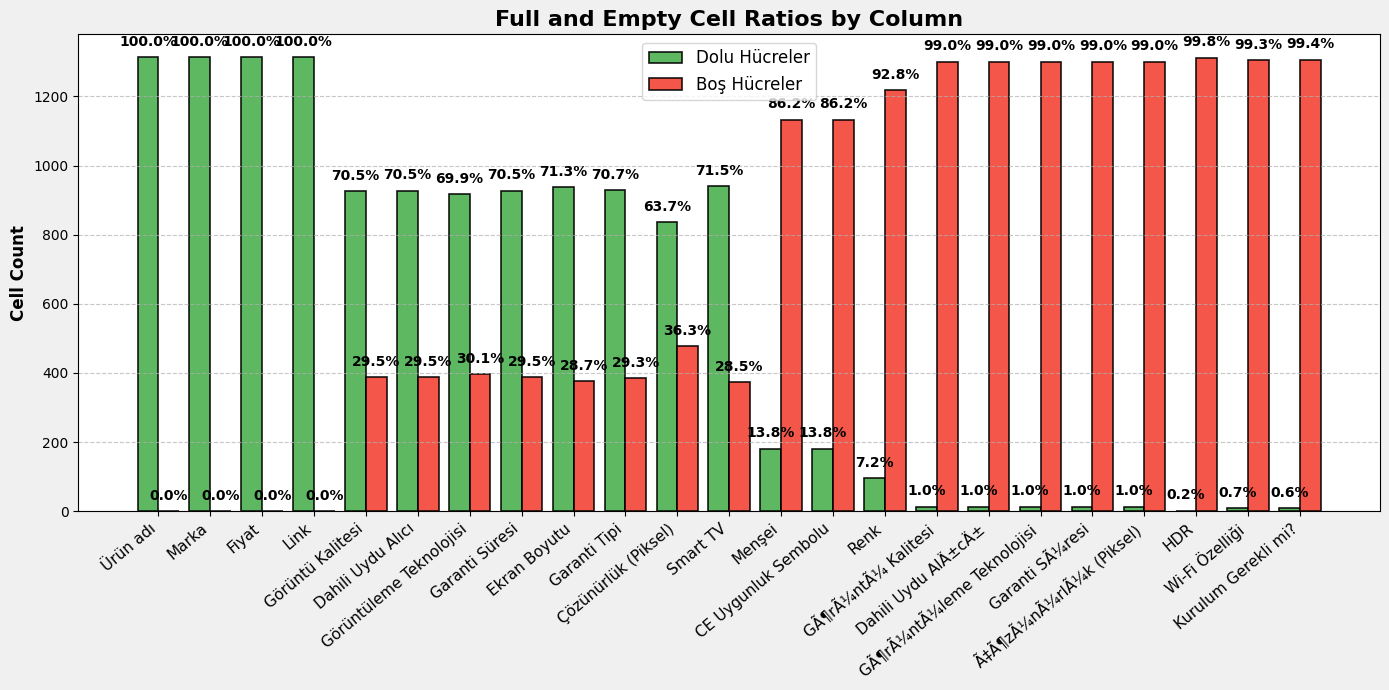

In [6]:
total_rows = len(df)
missing_counts = df.isnull().sum()
filled_counts = total_rows - missing_counts

columns = df.columns
x = np.arange(len(columns))
width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor('#f0f0f0')  


bar1 = ax.bar(x - width/2, filled_counts, width, label='Dolu Hücreler', 
              color='#4CAF50', edgecolor='black', linewidth=1.2, alpha=0.9)
bar2 = ax.bar(x + width/2, missing_counts, width, label='Boş Hücreler', 
              color='#F44336', edgecolor='black', linewidth=1.2, alpha=0.9)

def autolabel_percent(bars, counts):
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        percent = (count / total_rows) * 100
        ax.annotate(f'{percent:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 6),  # yukarı kaydır
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold',
                    color='black')

autolabel_percent(bar1, filled_counts)
autolabel_percent(bar2, missing_counts)


ax.set_ylabel('Cell Count', fontsize=12, fontweight='bold')
ax.set_title('Full and Empty Cell Ratios by Column', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(columns, rotation=40, ha='right', fontsize=11, fontweight='medium')
ax.legend(fontsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


In [7]:
df = df[df.isnull().sum(axis=1) <= 12]
df = df.iloc[:, :12]
df.head(10)

,Ürün adı,Marka,Fiyat,Link,Görüntü Kalitesi,Dahili Uydu Alıcı,Görüntüleme Teknolojisi,Garanti Süresi,Ekran Boyutu,Garanti Tipi,Çözünürlük (Piksel),Smart TV
0,"32OV5000H 32"" 82 Ekran Uydu Alıcılı HD LED TV",ONVO,"4.511,55 TL",https://www.trendyol.com/onvo/32ov5000h-32-82-...,HD Ready,Var,LED,2 Yıl,32 inç,Onvo Garantili,1366 x 768,Yok
1,"42ov6000f Full Hd 42"" 106 Ekran Uydu Alıcılı A...",ONVO,8.400 TL,https://www.trendyol.com/onvo/42ov6000f-full-h...,Full HD,Var,LED,2 Yıl,42 inç,Onvo Garantili,1920 x 1080,Var
5,"32ov6000h Hd 32"" 82 Ekran Uydu Alıcılı Android...",ONVO,"5.682,90 TL",https://www.trendyol.com/onvo/32ov6000h-hd-32-...,HD Ready,Var,LED,2 Yıl,32 inç,Resmi Distribütör Garantili,1366 x 768,Var
6,"B235000 4K Ultra Hd 50"" 127 Ekran Uydu Alicili...",AWOX,10.099 TL,https://www.trendyol.com/awox/b235000-4k-ultra...,4K Ultra HD,Var,LED,2 Yıl,"50"" / 127 Ekran",Resmi Distribütör Garantili,3840 x 2160,Var
8,32S5400AF UYUMLU 80 EKRAN FULL HD ANDRİOD SMAR...,TCL,6.699 TL,https://www.trendyol.com/tcl/32s5400af-uyumlu-...,Full HD,Var,LED,2 Yıl,32 inç,Resmi Distribütör Garantili,1920 x 1080,Var
9,SN32DAL04 32'' 81 Ekran Uydu Alıcılı HD Ready ...,Sunny,"4.359,55 TL",https://www.trendyol.com/sunny/sn32dal04-32-81...,HD Ready,Var,LED,2 Yıl,32 inç,Sunny Garantili,1366 x 768,Yok
11,"43PUS7609/62 43"" 4K UHD Uydu Alıcılı Smart LED TV",Philips,15.265 TL,https://www.trendyol.com/philips/43pus7609-62-...,4K Ultra HD,Var,LED,2 Yıl,43 inç,Philips TR Garantili,3840 x 2160,Var
12,"65T7B 65"" 165 Ekran Uydu Alıcılı 4K Ultra HD S...",TCL,29.999 TL,https://www.trendyol.com/tcl/65t7b-65-165-ekra...,4K Ultra HD,Var,QLED Pro,2 Yıl,"65"" / 165 Ekran",Bilkom Garantili,3840 x 2160,Var
13,SN65FMN252 65'' 165 Ekran Uydu Alıcılı 4K Ultr...,Sunny,21.415 TL,https://www.trendyol.com/sunny/sn65fmn252-65-1...,4K Ultra HD,Var,LED,3 Yıl,"65"" / 165 Ekran",Sunny Garantili,3840 x 2160,Var
15,"85qn900c 8k Ultra Hd 85"" 216 Ekran Uydu Alıcıl...",Samsung,315.000 TL,https://www.trendyol.com/samsung/85qn900c-8k-u...,8K Ultra HD,Var,QLED,2 Yıl,"85"" / 215 Ekran",Samsung TR Garantili,NaN,Var


In [8]:
df_reset = df.reset_index(drop=True)
df_reset.head()


,Ürün adı,Marka,Fiyat,Link,Görüntü Kalitesi,Dahili Uydu Alıcı,Görüntüleme Teknolojisi,Garanti Süresi,Ekran Boyutu,Garanti Tipi,Çözünürlük (Piksel),Smart TV
0,"32OV5000H 32"" 82 Ekran Uydu Alıcılı HD LED TV",ONVO,"4.511,55 TL",https://www.trendyol.com/onvo/32ov5000h-32-82-...,HD Ready,Var,LED,2 Yıl,32 inç,Onvo Garantili,1366 x 768,Yok
1,"42ov6000f Full Hd 42"" 106 Ekran Uydu Alıcılı A...",ONVO,8.400 TL,https://www.trendyol.com/onvo/42ov6000f-full-h...,Full HD,Var,LED,2 Yıl,42 inç,Onvo Garantili,1920 x 1080,Var
2,"32ov6000h Hd 32"" 82 Ekran Uydu Alıcılı Android...",ONVO,"5.682,90 TL",https://www.trendyol.com/onvo/32ov6000h-hd-32-...,HD Ready,Var,LED,2 Yıl,32 inç,Resmi Distribütör Garantili,1366 x 768,Var
3,"B235000 4K Ultra Hd 50"" 127 Ekran Uydu Alicili...",AWOX,10.099 TL,https://www.trendyol.com/awox/b235000-4k-ultra...,4K Ultra HD,Var,LED,2 Yıl,"50"" / 127 Ekran",Resmi Distribütör Garantili,3840 x 2160,Var
4,32S5400AF UYUMLU 80 EKRAN FULL HD ANDRİOD SMAR...,TCL,6.699 TL,https://www.trendyol.com/tcl/32s5400af-uyumlu-...,Full HD,Var,LED,2 Yıl,32 inç,Resmi Distribütör Garantili,1920 x 1080,Var


In [9]:
df.loc[:, ['Ürün adı', 'Ekran Boyutu']].head(5).style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
     {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '5px')]}]
).set_properties(**{'text-align': 'center'})


,Ürün adı,Ekran Boyutu
0,"32OV5000H 32"" 82 Ekran Uydu Alıcılı HD LED TV",32 inç
1,"42ov6000f Full Hd 42"" 106 Ekran Uydu Alıcılı Android Smart Led Tv",42 inç
5,"32ov6000h Hd 32"" 82 Ekran Uydu Alıcılı Android Smart Led Tv",32 inç
6,"B235000 4K Ultra Hd 50"" 127 Ekran Uydu Alicili Smart Led Tv","50"" / 127 Ekran"
8,32S5400AF UYUMLU 80 EKRAN FULL HD ANDRİOD SMART LED TV,32 inç


In [10]:
import re

ekran_boyutlari = []

for urun in df['Ürün adı']:
    words = urun.split()

    #Find "ekran"
    ekran_index = -1
    for i, word in enumerate(words):
        #print(word)
        if 'ekran' in word.lower():
            ekran_index = i
            break

    if ekran_index != -1:
        # Ekran kelimesinden önceki sayıları bulma
        numbers_before_ekran = []
        for j in range(ekran_index - 1, -1, -1):
            # Sayı içerip içermediğine bakma (örneğin: 32", 80)
            match = re.search(r'(\d+)"?', words[j]) 
            if match:
                number = int(match.group(1))
                # Ekran boyutu 80'den küçükse, geçersiz say
                if number >= 80:
                    numbers_before_ekran.append(number)
        
        # Eğer geçerli sayı varsa, en küçüğünü al (32" gibi küçük ekranları elemek için)
        if numbers_before_ekran:
            ekran_boyutlari.append(str(min(numbers_before_ekran)))
        else:
            ekran_boyutlari.append(None)
    else:
        ekran_boyutlari.append(None)


df['Ekran Boyutu'] = ekran_boyutlari

df = df[df.isna().sum(axis=1) <= 1]
df = df[~df.apply(lambda row: row.astype(str).str.contains('Null', case=False, na=False).any(), axis=1)]

df.loc[:, ['Ürün adı', 'Ekran Boyutu']].head(5).style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
     {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '5px')]}]
).set_properties(**{'text-align': 'center'})


,Ürün adı,Ekran Boyutu
0,"32OV5000H 32"" 82 Ekran Uydu Alıcılı HD LED TV",82
1,"42ov6000f Full Hd 42"" 106 Ekran Uydu Alıcılı Android Smart Led Tv",106
5,"32ov6000h Hd 32"" 82 Ekran Uydu Alıcılı Android Smart Led Tv",82
6,"B235000 4K Ultra Hd 50"" 127 Ekran Uydu Alicili Smart Led Tv",127
8,32S5400AF UYUMLU 80 EKRAN FULL HD ANDRİOD SMART LED TV,80


In [11]:
df.shape

(693, 12)

In [12]:
for col in df.columns:
    unique_count = df[col].nunique(dropna=False)
    print(col ,":", unique_count,"farklı değer var")


Ürün adı : 679 farklı değer var
Marka : 49 farklı değer var
Fiyat : 506 farklı değer var
Link : 690 farklı değer var
Görüntü Kalitesi : 4 farklı değer var
Dahili Uydu Alıcı : 2 farklı değer var
Görüntüleme Teknolojisi : 7 farklı değer var
Garanti Süresi : 2 farklı değer var
Ekran Boyutu : 41 farklı değer var
Garanti Tipi : 22 farklı değer var
Çözünürlük (Piksel) : 7 farklı değer var
Smart TV : 2 farklı değer var


In [13]:
df = df.reset_index(drop=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ürün adı                 693 non-null    object
 1   Marka                    693 non-null    object
 2   Fiyat                    693 non-null    object
 3   Link                     693 non-null    object
 4   Görüntü Kalitesi         693 non-null    object
 5   Dahili Uydu Alıcı        693 non-null    object
 6   Görüntüleme Teknolojisi  693 non-null    object
 7   Garanti Süresi           693 non-null    object
 8   Ekran Boyutu             420 non-null    object
 9   Garanti Tipi             691 non-null    object
 10  Çözünürlük (Piksel)      681 non-null    object
 11  Smart TV                 693 non-null    object
dtypes: object(12)
memory usage: 65.1+ KB


In [14]:
df.rename(columns={"Çözünürlük (Piksel)": "Çözünürlük"}, inplace=True)
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ürün adı                 693 non-null    object
 1   Marka                    693 non-null    object
 2   Fiyat                    693 non-null    object
 3   Link                     693 non-null    object
 4   Görüntü Kalitesi         693 non-null    object
 5   Dahili Uydu Alıcı        693 non-null    object
 6   Görüntüleme Teknolojisi  693 non-null    object
 7   Garanti Süresi           693 non-null    object
 8   Ekran Boyutu             420 non-null    object
 9   Garanti Tipi             691 non-null    object
 10  Çözünürlük               681 non-null    object
 11  Smart TV                 693 non-null    object
dtypes: object(12)
memory usage: 65.1+ KB


In [15]:
df.tail()

,Ürün adı,Marka,Fiyat,Link,Görüntü Kalitesi,Dahili Uydu Alıcı,Görüntüleme Teknolojisi,Garanti Süresi,Ekran Boyutu,Garanti Tipi,Çözünürlük,Smart TV
688,98 Inch Neo QLED 4K QN90D Tizen OS Smart TV (2...,Samsung,271.000 TL,https://www.trendyol.com/samsung/98-inch-neo-q...,4K Ultra HD,Var,OLED,2 Yıl,None,Samsung TR Garantili,3840 x 2160,Yok
689,"XU55GA660S 55""-140CM ULTRAHD 4K GOOGLE TV",Telefunken,18.999 TL,https://www.trendyol.com/telefunken/xu55ga660s...,4K Ultra HD,Var,LED,2 Yıl,None,Vestel Garantili,3840 x 2160,Var
690,"32t5300 Hd 32"" 82 Ekran Uydu Alıcılı Smart Led Tv",Samsung,18.790 TL,https://www.trendyol.com/samsung/32t5300-hd-32...,HD Ready,Var,LED,2 Yıl,82,Resmi Distribütör Garantili,1920 x 1080,Var
691,32H9520B 32'' Smart HD Ready Wi-Fi Mobil TV,VESTEL,15.799 TL,https://www.trendyol.com/vestel/32h9520b-32-sm...,HD Ready,Var,LED,3 Yıl,None,Vestel Garantili,1366 x 768,Var
692,AX24LED63 24'' 61 Ekran Uydu Alıcılı HD Ready ...,Axen,6.800 TL,https://www.trendyol.com/axen/ax24led63-24-61-...,HD Ready,Var,LED,2 Yıl,None,Sunny Garantili,1366 x 768,Yok


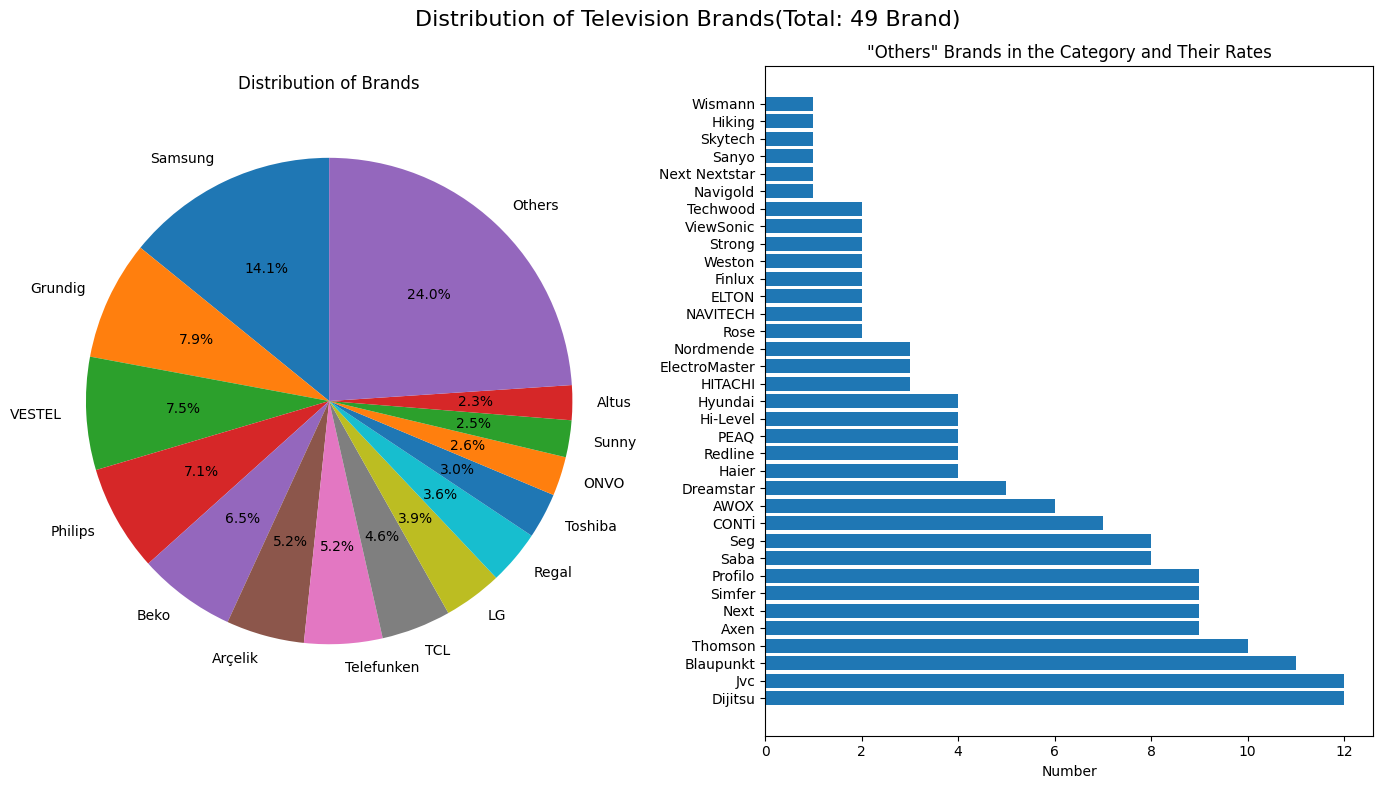

In [16]:
brand_counts = df['Marka'].value_counts()

# %1'in altında kalan markaları "Others" olarak gruplama
threshold = 0.02 * brand_counts.sum()
filtered_counts = brand_counts[brand_counts >= threshold]
others_counts = brand_counts[brand_counts < threshold]

others_count = others_counts.sum()
if others_count > 0:
    filtered_counts['Others'] = others_count

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

total_brands = len(brand_counts)
fig.suptitle(f'Distribution of Television Brands(Total: {total_brands} Brand)', fontsize=16)

ax1.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of Brands')

if others_count > 0:
    ax2.barh(others_counts.index, others_counts)
    ax2.set_title('"Others" Brands in the Category and Their Rates')
    ax2.set_xlabel('Number')

plt.tight_layout()
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ürün adı                 693 non-null    object
 1   Marka                    693 non-null    object
 2   Fiyat                    693 non-null    object
 3   Link                     693 non-null    object
 4   Görüntü Kalitesi         693 non-null    object
 5   Dahili Uydu Alıcı        693 non-null    object
 6   Görüntüleme Teknolojisi  693 non-null    object
 7   Garanti Süresi           693 non-null    object
 8   Ekran Boyutu             420 non-null    object
 9   Garanti Tipi             691 non-null    object
 10  Çözünürlük               681 non-null    object
 11  Smart TV                 693 non-null    object
dtypes: object(12)
memory usage: 65.1+ KB


In [18]:
for col in df.columns:
    unique_count = df[col].nunique(dropna=False)
    print(col ,":", unique_count,"farklı değer var")

Ürün adı : 679 farklı değer var
Marka : 49 farklı değer var
Fiyat : 506 farklı değer var
Link : 690 farklı değer var
Görüntü Kalitesi : 4 farklı değer var
Dahili Uydu Alıcı : 2 farklı değer var
Görüntüleme Teknolojisi : 7 farklı değer var
Garanti Süresi : 2 farklı değer var
Ekran Boyutu : 41 farklı değer var
Garanti Tipi : 22 farklı değer var
Çözünürlük : 7 farklı değer var
Smart TV : 2 farklı değer var


In [19]:
df_categoric = df[["Marka", "Garanti Tipi"]].copy()

df_categoric = pd.DataFrame(df_categoric)

df_numeric = df.drop(columns=["Link", "Ürün adı", "Marka", "Ekran Boyutu", "Garanti Tipi"])

df["Ekran Boyutu"] = pd.to_numeric(df["Ekran Boyutu"], errors="coerce")
df["Ekran Boyutu"].fillna(df["Ekran Boyutu"].median(), inplace=True)


df_numeric["Dahili Uydu Alıcı"] = df["Dahili Uydu Alıcı"].map({"Var": 1, "Yok": 0})
df_numeric["Smart TV"] = df["Smart TV"].map({"Var": 1, "Yok": 0})
df_numeric["Garanti Süresi"] = df["Garanti Süresi"].map({"2 Yıl": 0, "3 Yıl": 1})

one_hot = pd.get_dummies(df[["Görüntü Kalitesi", "Görüntüleme Teknolojisi"]], 
                         prefix=["GörüntüKalitesi", "GörüntülemeTeknolojisi"])

df_numeric = pd.concat([df_numeric, one_hot], axis=1)

df_numeric = df_numeric.replace({True: 1, False: 0})
df_numeric = pd.DataFrame(df_numeric)

df_categoric.head()


/var/folders/10/f6l__m_960b6hcgcw1vdk_wr0000gn/T/ipykernel_1422/3577458469.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ekran Boyutu"].fillna(df["Ekran Boyutu"].median(), inplace=True)
/var/folders/10/f6l__m_960b6hcgcw1vdk_wr0000gn/T/ipykernel_1422/3577458469.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

,Marka,Garanti Tipi
0,ONVO,Onvo Garantili
1,ONVO,Onvo Garantili
2,ONVO,Resmi Distribütör Garantili
3,AWOX,Resmi Distribütör Garantili
4,TCL,Resmi Distribütör Garantili


In [20]:
df_numeric.head()

,Fiyat,Görüntü Kalitesi,Dahili Uydu Alıcı,Görüntüleme Teknolojisi,Garanti Süresi,Çözünürlük,Smart TV,GörüntüKalitesi_4K Ultra HD,GörüntüKalitesi_8K Ultra HD,GörüntüKalitesi_Full HD,GörüntüKalitesi_HD Ready,GörüntülemeTeknolojisi_DLED,GörüntülemeTeknolojisi_LED,GörüntülemeTeknolojisi_OLED,GörüntülemeTeknolojisi_QD-Mini LED,GörüntülemeTeknolojisi_QLED,GörüntülemeTeknolojisi_QLED Pro,GörüntülemeTeknolojisi_QNED
0,"4.511,55 TL",HD Ready,1,LED,0,1366 x 768,0,0,0,0,1,0,1,0,0,0,0,0
1,8.400 TL,Full HD,1,LED,0,1920 x 1080,1,0,0,1,0,0,1,0,0,0,0,0
2,"5.682,90 TL",HD Ready,1,LED,0,1366 x 768,1,0,0,0,1,0,1,0,0,0,0,0
3,10.099 TL,4K Ultra HD,1,LED,0,3840 x 2160,1,1,0,0,0,0,1,0,0,0,0,0
4,6.699 TL,Full HD,1,LED,0,1920 x 1080,1,0,0,1,0,0,1,0,0,0,0,0


In [21]:
# Fiyat sütunundaki ilk sayısı aldık çünkü 9999 7885 yazıyor
df_numeric["Fiyat"] = (
    df["Fiyat"]
    .str.split().str[0]  # Boşlukla ayrılmışsa sadece ilk kısmı al
    .str.replace("TL", "", regex=False)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.strip()
    .astype(float)
)
df_numeric = df_numeric.drop(columns=["Görüntü Kalitesi", "Görüntüleme Teknolojisi"], errors="ignore")

df_numeric.head()

,Fiyat,Dahili Uydu Alıcı,Garanti Süresi,Çözünürlük,Smart TV,GörüntüKalitesi_4K Ultra HD,GörüntüKalitesi_8K Ultra HD,GörüntüKalitesi_Full HD,GörüntüKalitesi_HD Ready,GörüntülemeTeknolojisi_DLED,GörüntülemeTeknolojisi_LED,GörüntülemeTeknolojisi_OLED,GörüntülemeTeknolojisi_QD-Mini LED,GörüntülemeTeknolojisi_QLED,GörüntülemeTeknolojisi_QLED Pro,GörüntülemeTeknolojisi_QNED
0,4511.55,1,0,1366 x 768,0,0,0,0,1,0,1,0,0,0,0,0
1,8400.00,1,0,1920 x 1080,1,0,0,1,0,0,1,0,0,0,0,0
2,5682.90,1,0,1366 x 768,1,0,0,0,1,0,1,0,0,0,0,0
3,10099.00,1,0,3840 x 2160,1,1,0,0,0,0,1,0,0,0,0,0
4,6699.00,1,0,1920 x 1080,1,0,0,1,0,0,1,0,0,0,0,0


In [22]:
benzersiz_cozunurlukler = df_numeric["Çözünürlük"].unique()

print(benzersiz_cozunurlukler)

['1366 x 768' '1920 x 1080' '3840 x 2160' nan '4096 x 2160' '7680 x 4320'
 '1280 x 720']


In [23]:
# Çözünürlük sütunundaki piksel değerlerini hesaplama
def parse_resolution(res):
    try:
        # Çözünürlük değerini ayırma: "1366 x 768" -> [1366, 768]
        width, height = map(int, res.split(' x '))
        return width * height
    except:
        return np.nan

# Çözünürlük değerini sayısal hale çevirdik
df_numeric["Çözünürlük"] = df["Çözünürlük"].apply(parse_resolution)
df_numeric.head()


,Fiyat,Dahili Uydu Alıcı,Garanti Süresi,Çözünürlük,Smart TV,GörüntüKalitesi_4K Ultra HD,GörüntüKalitesi_8K Ultra HD,GörüntüKalitesi_Full HD,GörüntüKalitesi_HD Ready,GörüntülemeTeknolojisi_DLED,GörüntülemeTeknolojisi_LED,GörüntülemeTeknolojisi_OLED,GörüntülemeTeknolojisi_QD-Mini LED,GörüntülemeTeknolojisi_QLED,GörüntülemeTeknolojisi_QLED Pro,GörüntülemeTeknolojisi_QNED
0,4511.55,1,0,1049088.0,0,0,0,0,1,0,1,0,0,0,0,0
1,8400.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0
2,5682.90,1,0,1049088.0,1,0,0,0,1,0,1,0,0,0,0,0
3,10099.00,1,0,8294400.0,1,1,0,0,0,0,1,0,0,0,0,0
4,6699.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0


In [24]:
df_categoric = pd.get_dummies(df_categoric)
# Boolean verileri sayısala dönüştürüldü
df_categoric = df_categoric.replace({True: 1, False: 0})
df_categoric = pd.DataFrame(df_categoric)
print(df_categoric.shape)
df_categoric.head()

(693, 70)


/var/folders/10/f6l__m_960b6hcgcw1vdk_wr0000gn/T/ipykernel_1422/1411949695.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_categoric = df_categoric.replace({True: 1, False: 0})


,Marka_AWOX,Marka_Altus,Marka_Arçelik,Marka_Axen,Marka_Beko,Marka_Blaupunkt,Marka_CONTİ,Marka_Dijitsu,Marka_Dreamstar,Marka_ELTON,Marka_ElectroMaster,Marka_Finlux,Marka_Grundig,Marka_HITACHI,Marka_Haier,Marka_Hi-Level,Marka_Hiking,Marka_Hyundai,Marka_Jvc,Marka_LG,Marka_NAVITECH,Marka_Navigold,Marka_Next,Marka_Next Nextstar,Marka_Nordmende,Marka_ONVO,Marka_PEAQ,Marka_Philips,Marka_Profilo,Marka_Redline,Marka_Regal,Marka_Rose,Marka_Saba,Marka_Samsung,Marka_Sanyo,Marka_Seg,Marka_Simfer,Marka_Skytech,Marka_Strong,Marka_Sunny,Marka_TCL,Marka_Techwood,Marka_Telefunken,Marka_Thomson,Marka_Toshiba,Marka_VESTEL,Marka_ViewSonic,Marka_Weston,Marka_Wismann,Garanti Tipi_Altus Garantili,Garanti Tipi_Arçelik Garantili,Garanti Tipi_Awox Garantili,Garanti Tipi_Axen Garantili,Garanti Tipi_Beko Garantili,Garanti Tipi_Bilkom Garantili,Garanti Tipi_Dijitsu Garantili,Garanti Tipi_Grundig Garantili,Garanti Tipi_LG TR Garantili,Garanti Tipi_Next Garantili,Garanti Tipi_Onvo Garantili,Garanti Tipi_Philips TR Garantili,Garanti Tipi_Profilo Garantili,Garanti Tipi_Regal Garantili,Garanti Tipi_Resmi Distribütör Garantili,Garanti Tipi_Samsung TR Garantili,Garanti Tipi_Skytech Garantili,Garanti Tipi_Sunny Garantili,Garanti Tipi_Telefunken Garantili,Garanti Tipi_Vestel Garantili,Garanti Tipi_İthalatçı Garantili
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


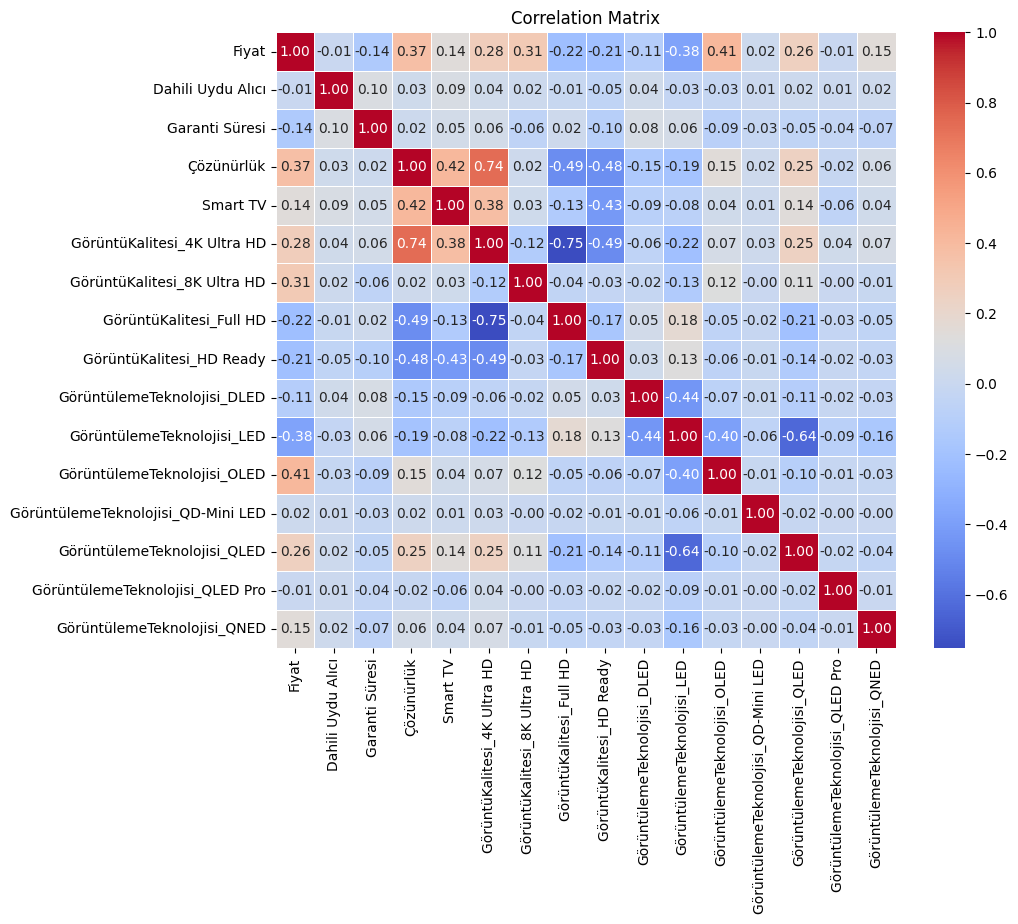

In [25]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


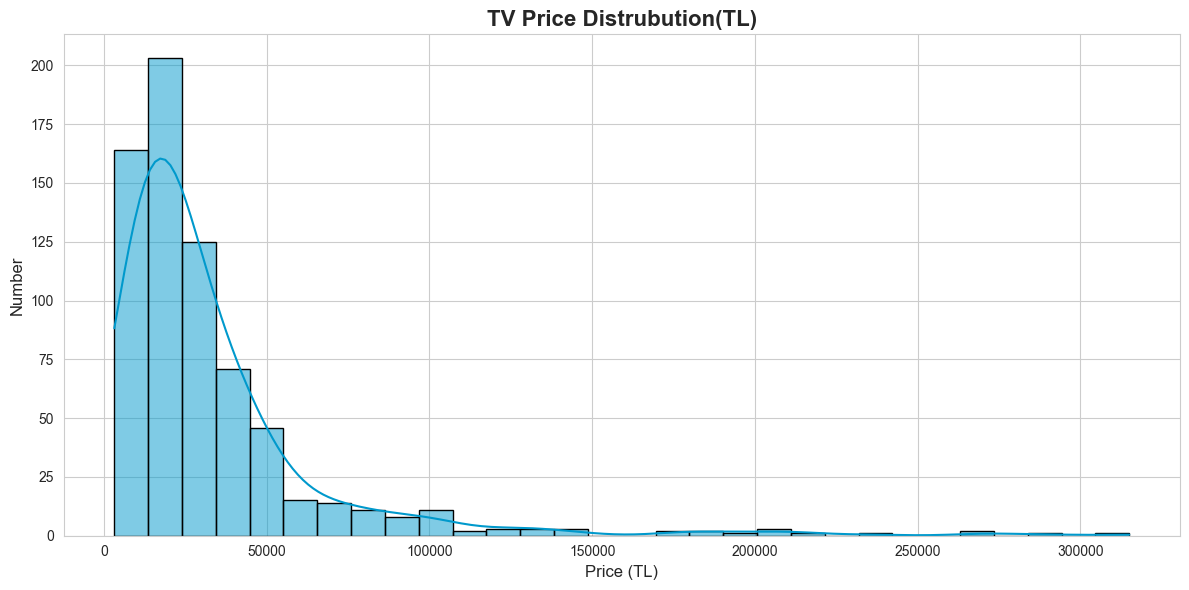

In [26]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.histplot(df_numeric['Fiyat'], kde=True, color='#0099cc', bins=30, edgecolor='black')
plt.title('TV Price Distrubution(TL)', fontsize=16, fontweight='bold')
plt.xlabel('Price (TL)', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


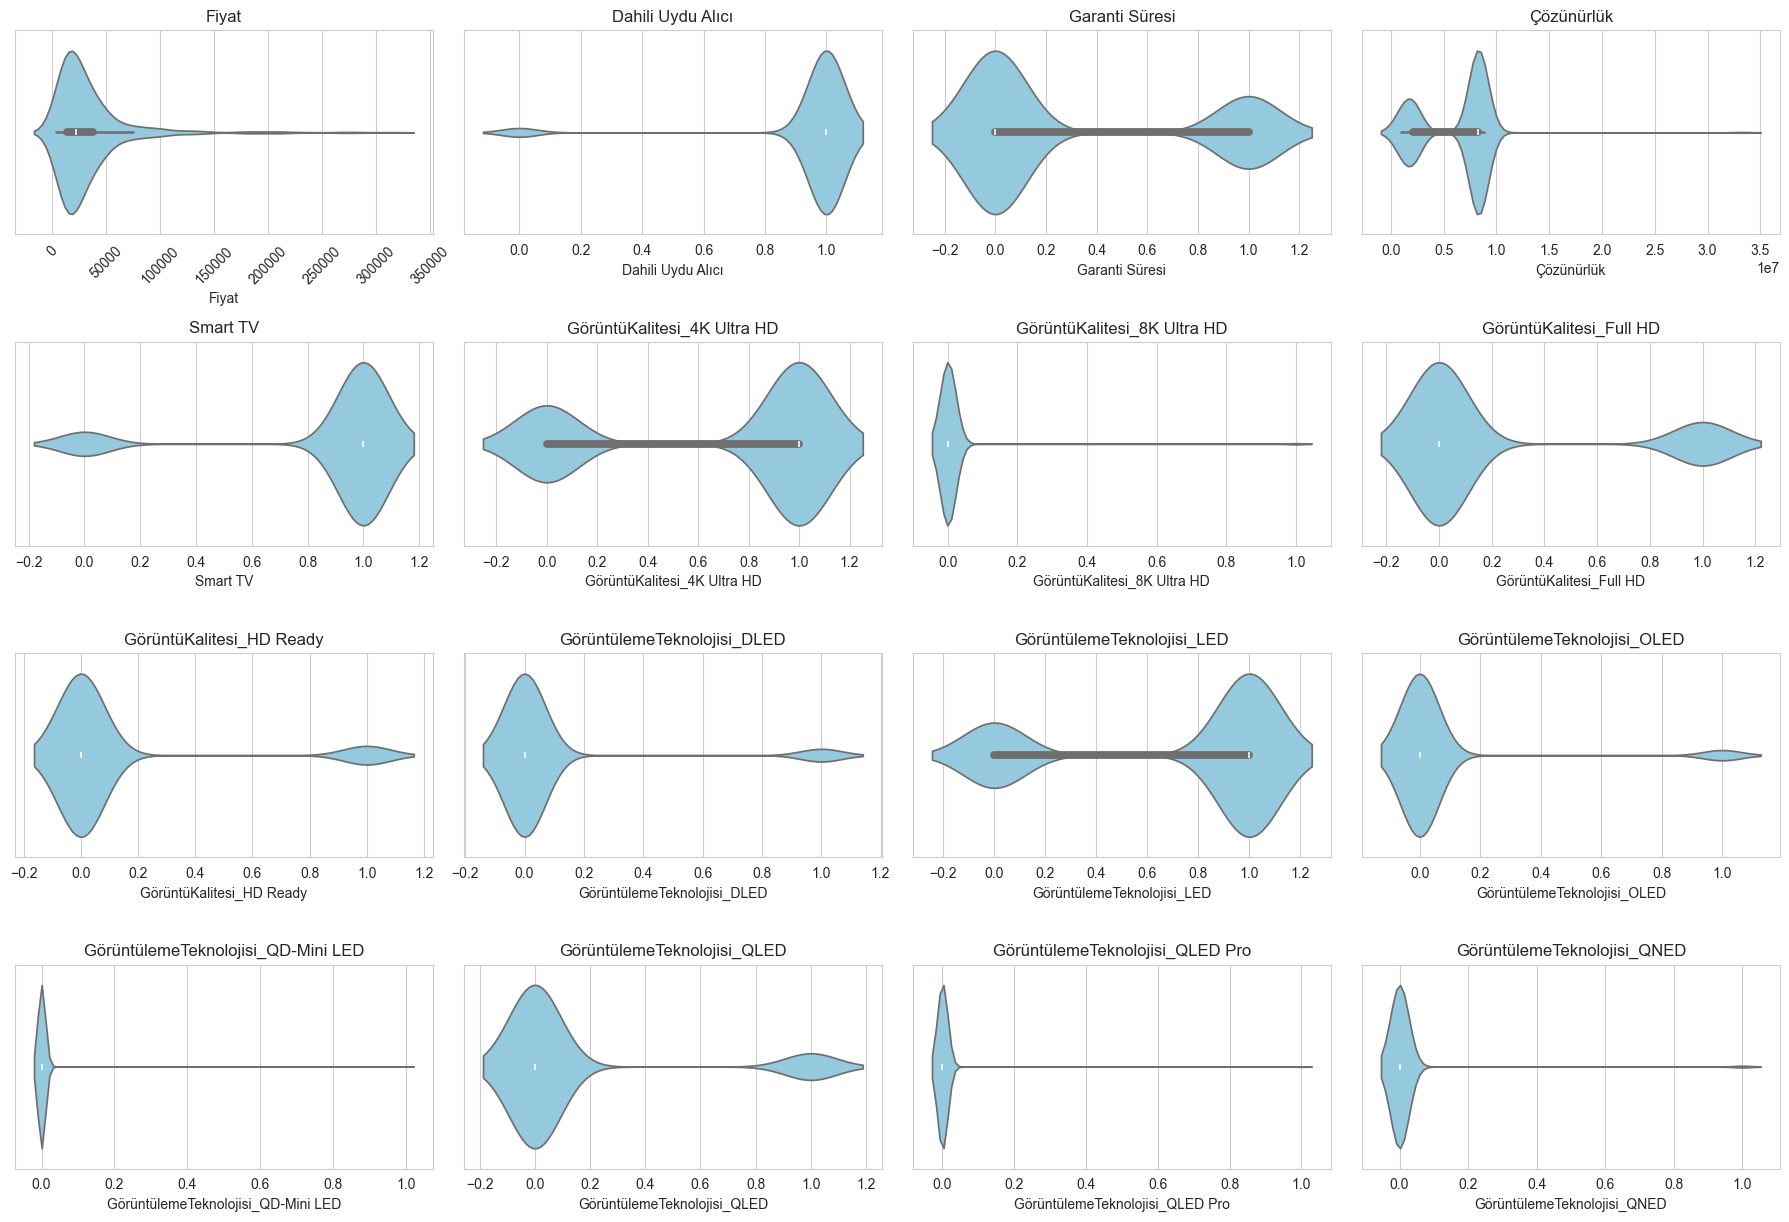

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = len(df_numeric.columns)
rows, cols = 5, 4  

fig, axes = plt.subplots(rows, cols, figsize=(18, 15))
axes = axes.flatten()

for i, column in enumerate(df_numeric.columns):
    sns.violinplot(x=df_numeric[column], ax=axes[i], color='skyblue')
    axes[i].set_title(column, fontsize=12)
    if column == 'Fiyat':
        axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [28]:
garanti_sutunlari = [col for col in df_categoric.columns if "Garanti Tipi" in col]

#create new garanti type feature
df_categoric['Garanti Tipi'] = df_categoric[garanti_sutunlari].apply(
    lambda row: "İthalatçı" if any("İthalatçı" in col and row[col] == 1 for col in garanti_sutunlari) else "Resmi",
    axis=1
)

df_categoric.drop(columns=garanti_sutunlari, inplace=True)
# Garanti Tipi sütununu 1(varsa) ve 0(yoksa) olarak güncelleme
df_categoric['Garanti Tipi'] = df_categoric['Garanti Tipi'].map({'Resmi': 1, 'İthalatçı': 0})

df_categoric.head()


,Marka_AWOX,Marka_Altus,Marka_Arçelik,Marka_Axen,Marka_Beko,Marka_Blaupunkt,Marka_CONTİ,Marka_Dijitsu,Marka_Dreamstar,Marka_ELTON,Marka_ElectroMaster,Marka_Finlux,Marka_Grundig,Marka_HITACHI,Marka_Haier,Marka_Hi-Level,Marka_Hiking,Marka_Hyundai,Marka_Jvc,Marka_LG,Marka_NAVITECH,Marka_Navigold,Marka_Next,Marka_Next Nextstar,Marka_Nordmende,Marka_ONVO,Marka_PEAQ,Marka_Philips,Marka_Profilo,Marka_Redline,Marka_Regal,Marka_Rose,Marka_Saba,Marka_Samsung,Marka_Sanyo,Marka_Seg,Marka_Simfer,Marka_Skytech,Marka_Strong,Marka_Sunny,Marka_TCL,Marka_Techwood,Marka_Telefunken,Marka_Thomson,Marka_Toshiba,Marka_VESTEL,Marka_ViewSonic,Marka_Weston,Marka_Wismann,Garanti Tipi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [29]:
df_numeric.head()

,Fiyat,Dahili Uydu Alıcı,Garanti Süresi,Çözünürlük,Smart TV,GörüntüKalitesi_4K Ultra HD,GörüntüKalitesi_8K Ultra HD,GörüntüKalitesi_Full HD,GörüntüKalitesi_HD Ready,GörüntülemeTeknolojisi_DLED,GörüntülemeTeknolojisi_LED,GörüntülemeTeknolojisi_OLED,GörüntülemeTeknolojisi_QD-Mini LED,GörüntülemeTeknolojisi_QLED,GörüntülemeTeknolojisi_QLED Pro,GörüntülemeTeknolojisi_QNED
0,4511.55,1,0,1049088.0,0,0,0,0,1,0,1,0,0,0,0,0
1,8400.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0
2,5682.90,1,0,1049088.0,1,0,0,0,1,0,1,0,0,0,0,0
3,10099.00,1,0,8294400.0,1,1,0,0,0,0,1,0,0,0,0,0
4,6699.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0


In [30]:
df_combined = pd.concat([df_numeric, df_categoric], axis=1)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 66 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Fiyat                               693 non-null    float64
 1   Dahili Uydu Alıcı                   693 non-null    int64  
 2   Garanti Süresi                      693 non-null    int64  
 3   Çözünürlük                          681 non-null    float64
 4   Smart TV                            693 non-null    int64  
 5   GörüntüKalitesi_4K Ultra HD         693 non-null    int64  
 6   GörüntüKalitesi_8K Ultra HD         693 non-null    int64  
 7   GörüntüKalitesi_Full HD             693 non-null    int64  
 8   GörüntüKalitesi_HD Ready            693 non-null    int64  
 9   GörüntülemeTeknolojisi_DLED         693 non-null    int64  
 10  GörüntülemeTeknolojisi_LED          693 non-null    int64  
 11  GörüntülemeTeknolojisi_OLED         693 non-n

In [31]:
df_combined.head()

,Fiyat,Dahili Uydu Alıcı,Garanti Süresi,Çözünürlük,Smart TV,GörüntüKalitesi_4K Ultra HD,GörüntüKalitesi_8K Ultra HD,GörüntüKalitesi_Full HD,GörüntüKalitesi_HD Ready,GörüntülemeTeknolojisi_DLED,GörüntülemeTeknolojisi_LED,GörüntülemeTeknolojisi_OLED,GörüntülemeTeknolojisi_QD-Mini LED,GörüntülemeTeknolojisi_QLED,GörüntülemeTeknolojisi_QLED Pro,GörüntülemeTeknolojisi_QNED,Marka_AWOX,Marka_Altus,Marka_Arçelik,Marka_Axen,Marka_Beko,Marka_Blaupunkt,Marka_CONTİ,Marka_Dijitsu,Marka_Dreamstar,Marka_ELTON,Marka_ElectroMaster,Marka_Finlux,Marka_Grundig,Marka_HITACHI,Marka_Haier,Marka_Hi-Level,Marka_Hiking,Marka_Hyundai,Marka_Jvc,Marka_LG,Marka_NAVITECH,Marka_Navigold,Marka_Next,Marka_Next Nextstar,Marka_Nordmende,Marka_ONVO,Marka_PEAQ,Marka_Philips,Marka_Profilo,Marka_Redline,Marka_Regal,Marka_Rose,Marka_Saba,Marka_Samsung,Marka_Sanyo,Marka_Seg,Marka_Simfer,Marka_Skytech,Marka_Strong,Marka_Sunny,Marka_TCL,Marka_Techwood,Marka_Telefunken,Marka_Thomson,Marka_Toshiba,Marka_VESTEL,Marka_ViewSonic,Marka_Weston,Marka_Wismann,Garanti Tipi
0,4511.55,1,0,1049088.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8400.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5682.90,1,0,1049088.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10099.00,1,0,8294400.0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6699.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [32]:
df_combined['Çözünürlük'] = df_combined['Çözünürlük'].fillna(df_combined['Çözünürlük'].median())

/opt/anaconda3/envs/miniconda/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/miniconda/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/miniconda/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/miniconda/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

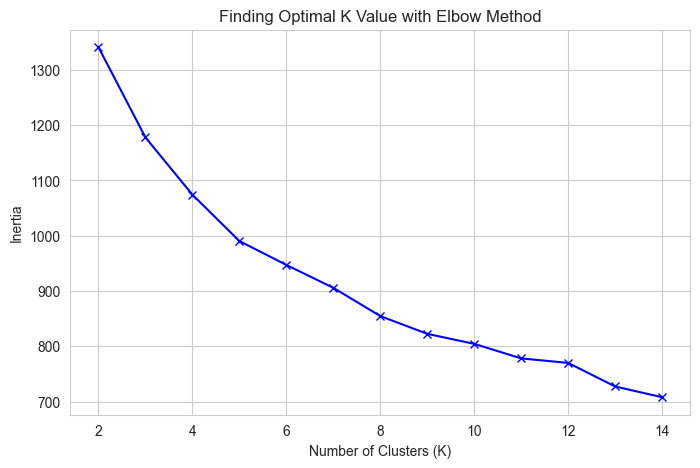

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


# Veri Scale edildi
scaler = MinMaxScaler()
df_combined_scaled = scaler.fit_transform(df_combined)

inertia_scores = []
K = range(2, 15)  # Küme sayısını 2 ile 14 arasında test ediyoruz(daha başka değerler arasında da denenebilir)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42) #Random state kısmı genelde 42 olarak kullanılıyor fakat hesaplanması konusunda değişiklik gösterebilir
    kmeans.fit(df_combined_scaled) 
    inertia_scores.append(kmeans.inertia_) 


plt.figure(figsize=(8, 5))
plt.plot(K, inertia_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Finding Optimal K Value with Elbow Method')
plt.show()

In [34]:
df_combined.head()

,Fiyat,Dahili Uydu Alıcı,Garanti Süresi,Çözünürlük,Smart TV,GörüntüKalitesi_4K Ultra HD,GörüntüKalitesi_8K Ultra HD,GörüntüKalitesi_Full HD,GörüntüKalitesi_HD Ready,GörüntülemeTeknolojisi_DLED,GörüntülemeTeknolojisi_LED,GörüntülemeTeknolojisi_OLED,GörüntülemeTeknolojisi_QD-Mini LED,GörüntülemeTeknolojisi_QLED,GörüntülemeTeknolojisi_QLED Pro,GörüntülemeTeknolojisi_QNED,Marka_AWOX,Marka_Altus,Marka_Arçelik,Marka_Axen,Marka_Beko,Marka_Blaupunkt,Marka_CONTİ,Marka_Dijitsu,Marka_Dreamstar,Marka_ELTON,Marka_ElectroMaster,Marka_Finlux,Marka_Grundig,Marka_HITACHI,Marka_Haier,Marka_Hi-Level,Marka_Hiking,Marka_Hyundai,Marka_Jvc,Marka_LG,Marka_NAVITECH,Marka_Navigold,Marka_Next,Marka_Next Nextstar,Marka_Nordmende,Marka_ONVO,Marka_PEAQ,Marka_Philips,Marka_Profilo,Marka_Redline,Marka_Regal,Marka_Rose,Marka_Saba,Marka_Samsung,Marka_Sanyo,Marka_Seg,Marka_Simfer,Marka_Skytech,Marka_Strong,Marka_Sunny,Marka_TCL,Marka_Techwood,Marka_Telefunken,Marka_Thomson,Marka_Toshiba,Marka_VESTEL,Marka_ViewSonic,Marka_Weston,Marka_Wismann,Garanti Tipi
0,4511.55,1,0,1049088.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8400.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5682.90,1,0,1049088.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10099.00,1,0,8294400.0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6699.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [35]:
df_scaled.head()

NameError: name 'df_scaled' is not defined

/opt/anaconda3/envs/miniconda/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/10/f6l__m_960b6hcgcw1vdk_wr0000gn/T/ipykernel_1422/4047379486.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster Label', data=cluster_df, palette='viridis')


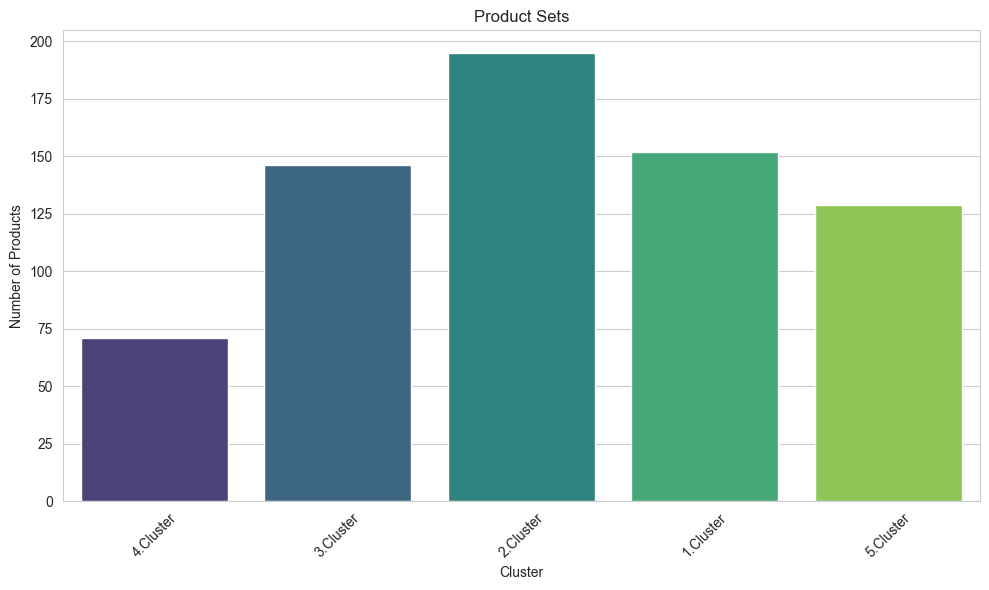

In [36]:
# 1. Veriyi ölçeklendirme
scaler = MinMaxScaler()
numeric_columns = df_combined.select_dtypes(include=[float, int]).columns
df_combined_scaled = scaler.fit_transform(df_combined[numeric_columns])
df_scaled = pd.DataFrame(df_combined_scaled, columns=numeric_columns)

# 2. Ürün adı ve link ekle
product_names = df['Ürün adı']  # doğru sütun adı olduğundan emin olun
links = df['Link']

# 3. K-Means ile kümeleme
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(df_scaled)

# 4. Sonuçları df_combined'a ekleme
df_combined['Cluster'] = labels

# 5. Küme etiketlerine anlamlı isimler atama
cluster_labels = {
    0: '1.Cluster',
    1: '2.Cluster',
    2: '3.Cluster',
    3: '4.Cluster',
    4: '5.Cluster'
}
df_combined['Cluster Label'] = df_combined['Cluster'].map(cluster_labels)

# 6. Cluster_df oluşturma
cluster_df = df_combined.copy()

# 7. Küme özetlerini hesaplama (isteğe bağlı)
cluster_summary = df_scaled.copy()
cluster_summary['Cluster'] = labels
summary_table = cluster_summary.groupby('Cluster').mean()

#print("Küme Özetleri (Özelliklerin Ortalama Değerleri):")
#print(summary_table)

# 8. Küme görselleştirmesi
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster Label', data=cluster_df, palette='viridis')
plt.title("Product Sets")
plt.xlabel('Cluster')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
# Ürün adı ve link sütunlarını cluster_df'e ekleme
cluster_df['Ürün adı'] = df['Ürün adı']
cluster_df['Link'] = df['Link']

# Kümeleri düzenli şekilde yazdırma
with open('clustered_products.txt', 'w', encoding='utf-8') as f:
    for cluster_num in range(num_clusters):
        f.write(f"\nKüme {cluster_num + 1}:\n")
        # İlgili kümeye ait ürünleri seçme
        cluster_items = cluster_df[cluster_df['Cluster'] == cluster_num][['Ürün adı', 'Link']]
        # Ürün adı ve linkleri sıralı şekilde yazdırma
        for index, row in cluster_items.iterrows():
            f.write(f"- {row['Ürün adı']}: {row['Link']}\n")
    print("Kümeleme tamamlandı! Sonuçlar 'clustered_products.txt' dosyasına kaydedildi.")


Kümeleme tamamlandı! Sonuçlar 'clustered_products.txt' dosyasına kaydedildi.


In [38]:
cluster_df.head()

,Fiyat,Dahili Uydu Alıcı,Garanti Süresi,Çözünürlük,Smart TV,GörüntüKalitesi_4K Ultra HD,GörüntüKalitesi_8K Ultra HD,GörüntüKalitesi_Full HD,GörüntüKalitesi_HD Ready,GörüntülemeTeknolojisi_DLED,GörüntülemeTeknolojisi_LED,GörüntülemeTeknolojisi_OLED,GörüntülemeTeknolojisi_QD-Mini LED,GörüntülemeTeknolojisi_QLED,GörüntülemeTeknolojisi_QLED Pro,GörüntülemeTeknolojisi_QNED,Marka_AWOX,Marka_Altus,Marka_Arçelik,Marka_Axen,Marka_Beko,Marka_Blaupunkt,Marka_CONTİ,Marka_Dijitsu,Marka_Dreamstar,Marka_ELTON,Marka_ElectroMaster,Marka_Finlux,Marka_Grundig,Marka_HITACHI,Marka_Haier,Marka_Hi-Level,Marka_Hiking,Marka_Hyundai,Marka_Jvc,Marka_LG,Marka_NAVITECH,Marka_Navigold,Marka_Next,Marka_Next Nextstar,Marka_Nordmende,Marka_ONVO,Marka_PEAQ,Marka_Philips,Marka_Profilo,Marka_Redline,Marka_Regal,Marka_Rose,Marka_Saba,Marka_Samsung,Marka_Sanyo,Marka_Seg,Marka_Simfer,Marka_Skytech,Marka_Strong,Marka_Sunny,Marka_TCL,Marka_Techwood,Marka_Telefunken,Marka_Thomson,Marka_Toshiba,Marka_VESTEL,Marka_ViewSonic,Marka_Weston,Marka_Wismann,Garanti Tipi,Cluster,Cluster Label,Ürün adı,Link
0,4511.55,1,0,1049088.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4.Cluster,"32OV5000H 32"" 82 Ekran Uydu Alıcılı HD LED TV",https://www.trendyol.com/onvo/32ov5000h-32-82-...
1,8400.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3.Cluster,"42ov6000f Full Hd 42"" 106 Ekran Uydu Alıcılı A...",https://www.trendyol.com/onvo/42ov6000f-full-h...
2,5682.90,1,0,1049088.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4.Cluster,"32ov6000h Hd 32"" 82 Ekran Uydu Alıcılı Android...",https://www.trendyol.com/onvo/32ov6000h-hd-32-...
3,10099.00,1,0,8294400.0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2.Cluster,"B235000 4K Ultra Hd 50"" 127 Ekran Uydu Alicili...",https://www.trendyol.com/awox/b235000-4k-ultra...
4,6699.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,3.Cluster,32S5400AF UYUMLU 80 EKRAN FULL HD ANDRİOD SMAR...,https://www.trendyol.com/tcl/32s5400af-uyumlu-...


In [39]:
from sklearn.metrics import silhouette_score

optimal_k = 5
print(f"Optimal K değeri: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(df_combined_scaled)

try:
    score = silhouette_score(df_combined_scaled, labels)
    print(f"Silhouette Skoru: {score:.4f}")
except Exception as e:
    print(f"Silhouette skoru hesaplanamadı: {e}")


Optimal K değeri: 5
Silhouette Skoru: 0.1797


/opt/anaconda3/envs/miniconda/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
df_combined.head()

,Fiyat,Dahili Uydu Alıcı,Garanti Süresi,Çözünürlük,Smart TV,GörüntüKalitesi_4K Ultra HD,GörüntüKalitesi_8K Ultra HD,GörüntüKalitesi_Full HD,GörüntüKalitesi_HD Ready,GörüntülemeTeknolojisi_DLED,GörüntülemeTeknolojisi_LED,GörüntülemeTeknolojisi_OLED,GörüntülemeTeknolojisi_QD-Mini LED,GörüntülemeTeknolojisi_QLED,GörüntülemeTeknolojisi_QLED Pro,GörüntülemeTeknolojisi_QNED,Marka_AWOX,Marka_Altus,Marka_Arçelik,Marka_Axen,Marka_Beko,Marka_Blaupunkt,Marka_CONTİ,Marka_Dijitsu,Marka_Dreamstar,Marka_ELTON,Marka_ElectroMaster,Marka_Finlux,Marka_Grundig,Marka_HITACHI,Marka_Haier,Marka_Hi-Level,Marka_Hiking,Marka_Hyundai,Marka_Jvc,Marka_LG,Marka_NAVITECH,Marka_Navigold,Marka_Next,Marka_Next Nextstar,Marka_Nordmende,Marka_ONVO,Marka_PEAQ,Marka_Philips,Marka_Profilo,Marka_Redline,Marka_Regal,Marka_Rose,Marka_Saba,Marka_Samsung,Marka_Sanyo,Marka_Seg,Marka_Simfer,Marka_Skytech,Marka_Strong,Marka_Sunny,Marka_TCL,Marka_Techwood,Marka_Telefunken,Marka_Thomson,Marka_Toshiba,Marka_VESTEL,Marka_ViewSonic,Marka_Weston,Marka_Wismann,Garanti Tipi,Cluster,Cluster Label
0,4511.55,1,0,1049088.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4.Cluster
1,8400.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3.Cluster
2,5682.90,1,0,1049088.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4.Cluster
3,10099.00,1,0,8294400.0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2.Cluster
4,6699.00,1,0,2073600.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,3.Cluster


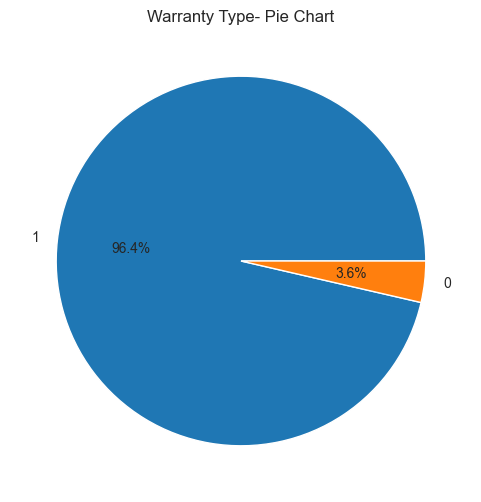

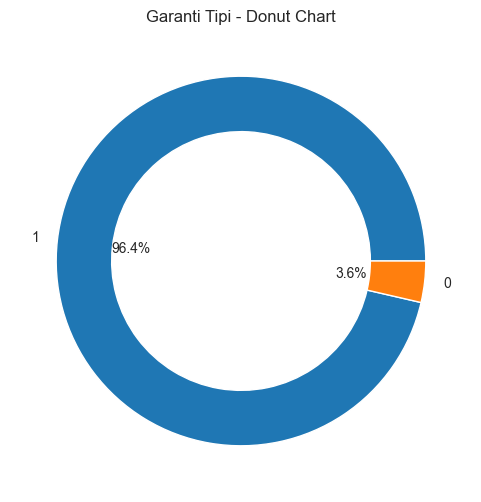

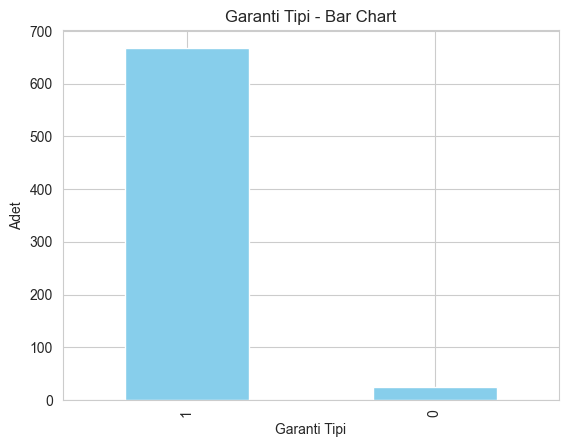

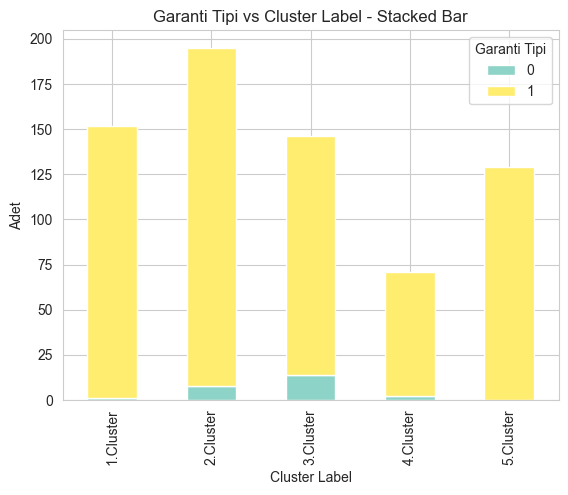

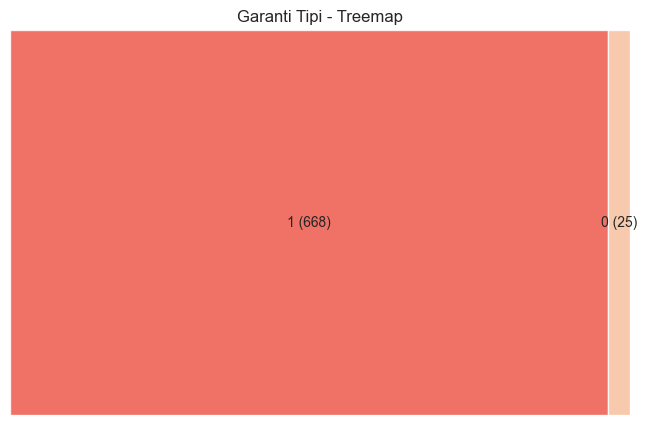

In [ ]:
!pip install squarify
import squarify
import plotly.express as px

garanti_counts = df_combined['Garanti Tipi'].value_counts()

# a. Pie Chart
garanti_counts.plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Warranty Type- Pie Chart")
plt.ylabel("")
plt.show()

# b. Donut Chart
garanti_counts.plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.3), figsize=(6,6))
plt.title("Garanti Tipi - Donut Chart")
plt.ylabel("")
plt.show()

# c. Bar Chart
garanti_counts.plot(kind='bar', color='skyblue')
plt.title("Garanti Tipi - Bar Chart")
plt.xlabel("Garanti Tipi")
plt.ylabel("Adet")
plt.show()

# d. Stacked Bar (Garanti Tipi vs Cluster)
pd.crosstab(df_combined['Cluster Label'], df_combined['Garanti Tipi']).plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Garanti Tipi vs Cluster Label - Stacked Bar")
plt.xlabel("Cluster Label")
plt.ylabel("Adet")
plt.show()

# e. Treemap
plt.figure(figsize=(8,5))
squarify.plot(sizes=garanti_counts.values, label=[f"{i} ({v})" for i, v in garanti_counts.items()], alpha=.8)
plt.title("Garanti Tipi - Treemap")
plt.axis('off')
plt.show()

# f. Sunburst (Cluster -> Garanti Tipi)
fig = px.sunburst(df_combined, path=['Cluster Label', 'Garanti Tipi'], title="Sunburst: Cluster > Garanti Tipi")
fig.show()


In [42]:
# Küçük oranlı kategorileri "Diğer" olarak grupla
threshold = 0.03 * tech_counts.sum()  # %3'ten küçükleri grupla
main_tech = tech_counts[tech_counts >= threshold]
other_tech = tech_counts[tech_counts < threshold]
main_tech['Diğer'] = other_tech.sum()

main_tech.plot.pie(autopct='%1.1f%%', figsize=(8,8))
plt.title("Imaging Technology - Pie Chart")
plt.ylabel("")
plt.show()


NameError: name 'tech_counts' is not defined

In [ ]:
quality_cols = [col for col in df_combined.columns if col.startswith("GörüntüKalitesi_")]
quality_counts = df_combined[quality_cols].sum().sort_values(ascending=False)

# a. Pie Chart
quality_counts.plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Image Quality - Pie Chart")
plt.ylabel("")
plt.show()

# b. Donut Chart
quality_counts.plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.3), figsize=(6,6))
plt.title("Görüntü Kalitesi - Donut Chart")
plt.ylabel("")
plt.show()

# c. Bar Chart
quality_counts.plot(kind='bar', color='lightgreen')
plt.title("Görüntü Kalitesi - Bar Chart")
plt.xlabel("Görüntü Kalitesi")
plt.ylabel("Adet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# d. Stacked Bar (Görüntü Kalitesi vs Cluster)
pd.crosstab(df_combined['Cluster Label'], df_combined[quality_cols].idxmax(axis=1)).plot(kind='bar', stacked=True, colormap='Paired')
plt.title("Görüntü Kalitesi vs Cluster Label - Stacked Bar")
plt.xlabel("Cluster Label")
plt.ylabel("Adet")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# e. Treemap
plt.figure(figsize=(8,5))
squarify.plot(sizes=quality_counts.values, label=[f"{i} ({v})" for i, v in quality_counts.items()], alpha=.8)
plt.title("Görüntü Kalitesi - Treemap")
plt.axis('off')
plt.show()

# f. Sunburst (Cluster -> Kalite)
df['Görüntü Kalitesi'] = df[quality_cols].idxmax(axis=1)
fig = px.sunburst(df_combined, path=['Cluster Label', 'Görüntü Kalitesi'], title="Sunburst: Cluster > Görüntü Kalitesi")
fig.show()


In [ ]:
import tkinter as tk
from tkinter import ttk
from sklearn.metrics.pairwise import cosine_similarity

class TVFilterApp(tk.Tk):
    def __init__(self, df, cluster_df):
        super().__init__()
        self.title('TV Filter')
        self.geometry('1000x850')
        self.df = df
        self.cluster_df = cluster_df

        # Seçenek sütunları
        self.image_quality_columns = [col for col in df.columns if col.startswith('GörüntüKalitesi_')]
        self.display_tech_columns = [col for col in df.columns if col.startswith('GörüntülemeTeknolojisi_')]
        self.brand_columns = [col for col in df.columns if col.startswith('Marka_')]

        # Seçim için opsiyonları oluştur
        image_quality_options = ['None'] + [col.split('_', 1)[1] for col in self.image_quality_columns]
        display_tech_options = ['None'] + [col.split('_', 1)[1] for col in self.display_tech_columns]
        brand_options = ['None'] + [col.split('_', 1)[1] for col in self.brand_columns]

        # Fiyat Aralığı
        ttk.Label(self, text='Fiyat Aralığı (₺)').pack()
        self.min_price = tk.DoubleVar()
        self.max_price = tk.DoubleVar()
        price_frame = ttk.Frame(self)
        ttk.Entry(price_frame, textvariable=self.min_price, width=10).pack(side='left')
        ttk.Label(price_frame, text=' - ').pack(side='left')
        ttk.Entry(price_frame, textvariable=self.max_price, width=10).pack(side='left')
        price_frame.pack(pady=5)

        # Dahili Uydu Alıcı
        ttk.Label(self, text='Dahili Uydu Alıcı').pack()
        self.receiver_var = tk.IntVar(value=-1)
        receiver_frame = ttk.Frame(self)
        for txt, val in [('Evet', 1), ('Hayır', 0), ('Farketmez', -1)]:
            ttk.Radiobutton(receiver_frame, text=txt, variable=self.receiver_var, value=val).pack(side='left')
        receiver_frame.pack(pady=5)

        # Garanti Süresi
        ttk.Label(self, text='Garanti Süresi').pack()
        self.warranty_var = tk.IntVar(value=-1)
        warranty_frame = ttk.Frame(self)
        for txt, val in [('2 Yıl', 0), ('3 Yıl', 1), ('Farketmez', -1)]:
            ttk.Radiobutton(warranty_frame, text=txt, variable=self.warranty_var, value=val).pack(side='left')
        warranty_frame.pack(pady=5)

        # Çözünürlük değerlerini doğru formata dönüştüren sözlük
        resolution_map = {
            1049088.0: "1366 x 768",
            921600.0: "1280 x 720",
            2073600.0: "1920 x 1080",
            8294400.0: "3840 x 2160",
            8847360.0: "4096 x 2160",
            33177600.0: "7680 x 4320"
        }

        # GUI'de gösterilecek çözünürlük değerlerini hazırlama
        resolutions = ['None'] + [
            resolution_map.get(res, str(res)) for res in df['Çözünürlük'].dropna().unique().tolist()
        ]

        # Çözünürlük bölümünü güncelleme
        ttk.Label(self, text='Çözünürlük').pack()
        self.resolution_var = tk.StringVar()
        res_combo = ttk.Combobox(self, textvariable=self.resolution_var)
        res_combo['values'] = resolutions
        res_combo.pack(pady=5)


        # Görüntü Kalitesi
        ttk.Label(self, text='Görüntü Kalitesi').pack()
        self.image_quality_var = tk.StringVar()
        iq_combo = ttk.Combobox(self, textvariable=self.image_quality_var)
        iq_combo['values'] = image_quality_options
        iq_combo.pack(pady=5)

        # Görüntüleme Teknolojisi
        ttk.Label(self, text='Görüntüleme Teknolojisi').pack()
        self.display_tech_var = tk.StringVar()
        dt_combo = ttk.Combobox(self, textvariable=self.display_tech_var)
        dt_combo['values'] = display_tech_options
        dt_combo.pack(pady=5)

        # Marka
        ttk.Label(self, text='Marka').pack()
        self.brand_var = tk.StringVar()
        brand_combo = ttk.Combobox(self, textvariable=self.brand_var)
        brand_combo['values'] = brand_options
        brand_combo.pack(pady=5)

        # Garanti Tipi
        ttk.Label(self, text='Garanti Tipi').pack()
        self.warranty_type_var = tk.IntVar(value=-1)
        warranty_type_frame = ttk.Frame(self)
        for txt, val in [('TR Garantili', 1), ('İthalatçı', 0), ('Farketmez', -1)]:
            ttk.Radiobutton(warranty_type_frame, text=txt, variable=self.warranty_type_var, value=val).pack(side='left')
        warranty_type_frame.pack(pady=5)

        # Sonuç kutusu
        self.results_text = tk.Text(self, height=15, width=100, bg='black', fg='white')
        self.results_text.pack(pady=10)

        # Uygula butonu
        ttk.Button(self, text="Uygula", command=self.find_similar_products).pack(pady=10)

    def find_similar_products(self):
        self.results_text.delete(1.0, tk.END)

        # Kullanıcı seçimlerini al
        selected_image_quality = self.image_quality_var.get()
        selected_display_tech = self.display_tech_var.get()
        selected_brand = self.brand_var.get()
        selected_resolution = self.resolution_var.get()

        # Fiyat girişlerini kontrol et ve geçerli değilse varsayılan değerler kullan
       
        min_price = float(self.min_price.get()) 
        max_price = float(self.max_price.get())
    

        selected_receiver = self.receiver_var.get()
        selected_warranty = self.warranty_var.get()
        selected_warranty_type = self.warranty_type_var.get()

        # Filtrele
        f = pd.Series([True] * len(self.df))
        if selected_image_quality != 'None':
            col = f'GörüntüKalitesi_{selected_image_quality}'
            f &= self.df.get(col, 0) == 1
        if selected_display_tech != 'None':
            col = f'GörüntülemeTeknolojisi_{selected_display_tech}'
            f &= self.df.get(col, 0) == 1
        if selected_brand != 'None':
            col = f'Marka_{selected_brand}'
            f &= self.df.get(col, 0) == 1
        if selected_resolution != 'None':
            f &= self.df['Çözünürlük'] == selected_resolution
        f &= (self.df['Fiyat'] >= min_price) & (self.df['Fiyat'] <= max_price)
        if selected_receiver != -1:
            f &= self.df['Dahili Uydu Alıcı'] == selected_receiver
        if selected_warranty != -1:
            f &= self.df['Garanti Süresi'] == selected_warranty
        if selected_warranty_type != -1:
            f &= self.df['Garanti Tipi'] == selected_warranty_type

        filtered = self.df[f]

        if not filtered.empty:
            self.results_text.insert(tk.END, f"🎯 Filtre ile eşleşen {len(filtered)} ürün bulundu:\n\n")
            for _, row in filtered.iterrows():
                self.results_text.insert(tk.END, f"- {row['Ürün adı']}\n  Link: {row['Link']}\n\n")
        else:
            self.results_text.insert(tk.END, "❌ Eşleşen ürün bulunamadı.\n🔍 Benzer ürünler getiriliyor...\n\n")

            # Özellik vektörünü hazırla
            feature_cols = self.image_quality_columns + self.display_tech_columns + self.brand_columns + ['Fiyat', 'Dahili Uydu Alıcı', 'Garanti Süresi', 'Garanti Tipi']
            selected_features = []

            for col in feature_cols:
                if col in self.image_quality_columns:
                    val = 1 if selected_image_quality != 'None' and col.endswith(selected_image_quality) else 0
                elif col in self.display_tech_columns:
                    val = 1 if selected_display_tech != 'None' and col.endswith(selected_display_tech) else 0
                elif col in self.brand_columns:
                    val = 1 if selected_brand != 'None' and col.endswith(selected_brand) else 0
                elif col == 'Fiyat':
                    val = (min_price + max_price) / 2  # ortalama
                elif col == 'Dahili Uydu Alıcı':
                    val = selected_receiver if selected_receiver != -1 else 0
                elif col == 'Garanti Süresi':
                    val = selected_warranty if selected_warranty != -1 else 0
                elif col == 'Garanti Tipi':
                    val = selected_warranty_type if selected_warranty_type != -1 else 0
                selected_features.append(val)

            selected_features = np.array(selected_features)

            # En yakın cluster'ı bul
            cluster_distances = []
            for _, row in self.cluster_df.iterrows():
                cluster_center = row[feature_cols].values
                dist = np.linalg.norm(cluster_center - selected_features)
                cluster_distances.append(dist)

            nearest_cluster_idx = np.argmin(cluster_distances)
            nearest_cluster_label = int(self.cluster_df.iloc[nearest_cluster_idx]['Cluster'])


            self.results_text.insert(tk.END, f"🔍 En yakın cluster: {nearest_cluster_label}\n\n")

            # O cluster'daki ürünleri al
            cluster_items = self.cluster_df[self.cluster_df['Cluster'] == nearest_cluster_label]

            if cluster_items.empty:
                self.results_text.insert(tk.END, "❌ Bu cluster'da ürün bulunamadı.\n")
                return

            # Benzerlik hesapla
            sim_matrix = cosine_similarity([selected_features], cluster_items[feature_cols].values)
            top_indices = sim_matrix[0].argsort()[-5:][::-1]

            for i in top_indices:
                link = cluster_items.iloc[i]['Link']
                self.results_text.insert(tk.END, f"  Link: {link}\n\n")


if __name__ == '__main__':
    # df_combined ve cluster_df'yi yüklediğin varsayılıyor
    app = TVFilterApp(df_combined, cluster_df)
    app.mainloop()


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = df_scaled 
labels = cluster_df['Cluster Label'].values  # Küme etiketlerini alıyoruz

#Linkage matrisi oluşturma
linked = linkage(data, method='ward', metric='euclidean')  # 'ward' metodu ve Öklidyen mesafe

#Dendrogram çizimi
plt.figure(figsize=(12, 8))  
dendrogram(
    linked,
    labels=labels,  
    p=5,
    truncate_mode='lastp',
    show_leaf_counts=True,
    leaf_font_size=10,
)

# Başlık ve etiketler
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Label")
plt.ylabel("Distance")
plt.show()
